In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("asaniczka/uk-optimal-product-price-prediction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\hsdc\.cache\kagglehub\datasets\asaniczka\uk-optimal-product-price-prediction\versions\3


In [2]:
import pandas as pd
amazon_df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
amazon_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [ ]:
#PART 1 - 1) Frequency Tables
category_frequency = amazon_df['category'].value_counts()
category_frequency.head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

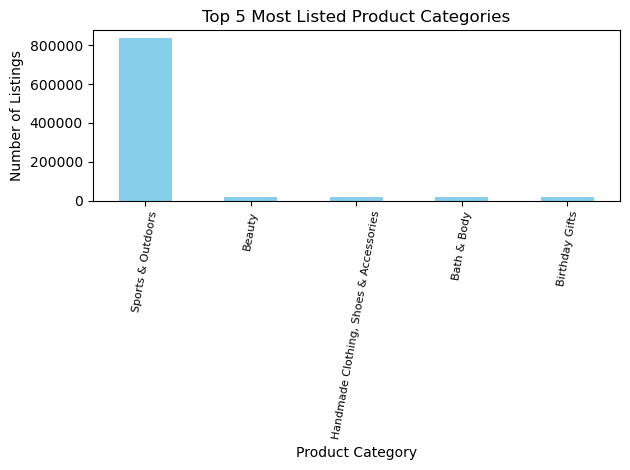

In [ ]:
#PART 1 - 2) Visualizations

import matplotlib.pyplot as plt
category_frequency.head(5).plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Listed Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Listings')
plt.xticks(fontsize = 8, rotation=80)
plt.tight_layout()
plt.show()

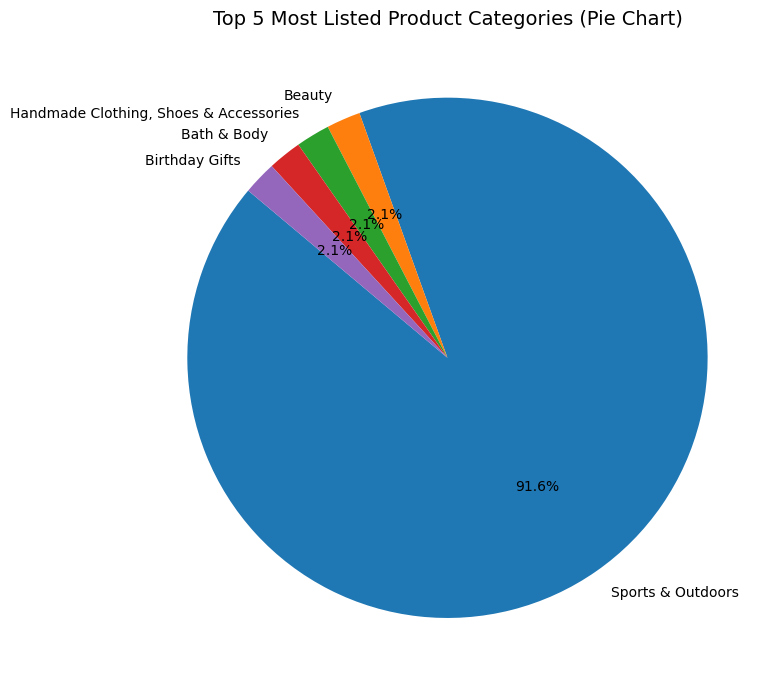

In [13]:
top5 = category_frequency.head(5)

plt.figure(figsize=(8, 8))
plt.pie(top5, labels=top5.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10})
plt.title('Top 5 Most Listed Product Categories (Pie Chart)', fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
#PART 2 - 1) Measures of Centrality
mean_price = amazon_df['price'].mean()
median_price = amazon_df['price'].median()
mode_price = amazon_df['price'].mode()

print(f"Mean (Average) Price: £{mean_price:.2f}")
print(f"Median Price: £{median_price:.2f}")
print(f"Mode Price(s): {mode_price.tolist()}")

Mean (Average) Price: £89.24
Median Price: £19.09
Mode Price(s): [9.99]


In [ ]:
#The average price is higher because some expensive items skew the mean upward.
#The most common price being low (e.g., £9.99) suggests a large number of low-cost products dominate the listings.
#This indicates a right-skewed distribution: most items are cheap, but a few high-priced items increase the average.

In [18]:
#PART 2 - 2) Measures of Dispersion

price_variance = amazon_df['price'].var()

price_std = amazon_df['price'].std()

price_range = amazon_df['price'].max() - amazon_df['price'].min()

Q1 = amazon_df['price'].quantile(0.25)
Q3 = amazon_df['price'].quantile(0.75)
price_iqr = Q3 - Q1

print(f"Price Variance: {price_variance:.2f}")
print(f"Standard Deviation: {price_std:.2f}")
print(f"Price Range: £{amazon_df['price'].min():.2f} to £{amazon_df['price'].max():.2f} (Range = £{price_range:.2f})")
print(f"Interquartile Range (IQR): £{price_iqr:.2f}")

Price Variance: 119445.49
Standard Deviation: 345.61
Price Range: £0.00 to £100000.00 (Range = £100000.00)
Interquartile Range (IQR): £36.00


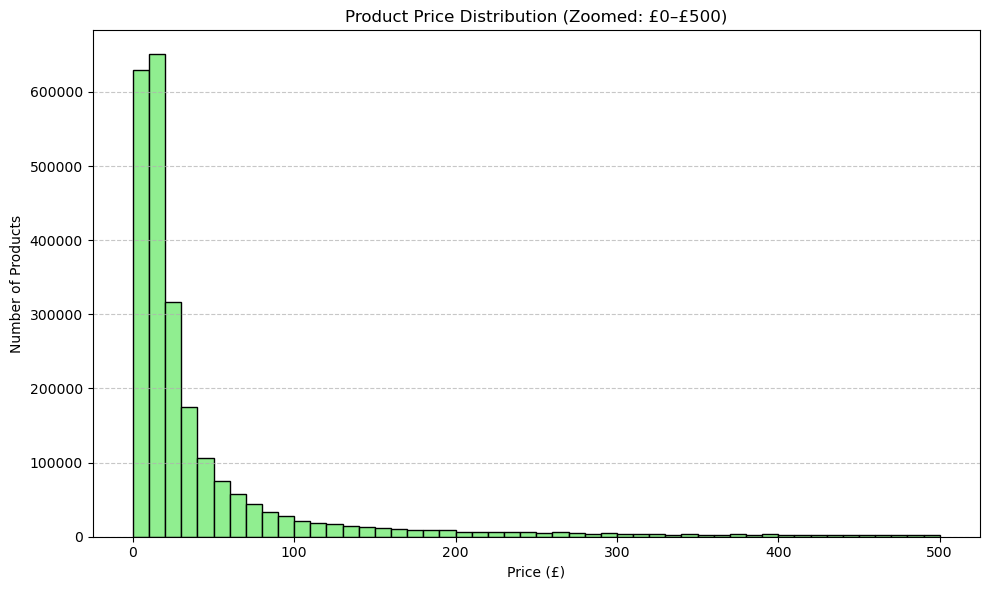

In [ ]:
#PART 2 - 3) Visualizations
plt.figure(figsize=(10, 6))
plt.hist(amazon_df[amazon_df['price'] <= 500]['price'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Product Price Distribution (Zoomed: £0–£500)')
plt.xlabel('Price (£)')
plt.ylabel('Number of Products')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#The problem found: The chart is hard to read because there's a huge outlier (a product price at £100,000) stretching the x-axis.
#My solution: I've decided to limit the x-axis to a considerably smaller range (£500).

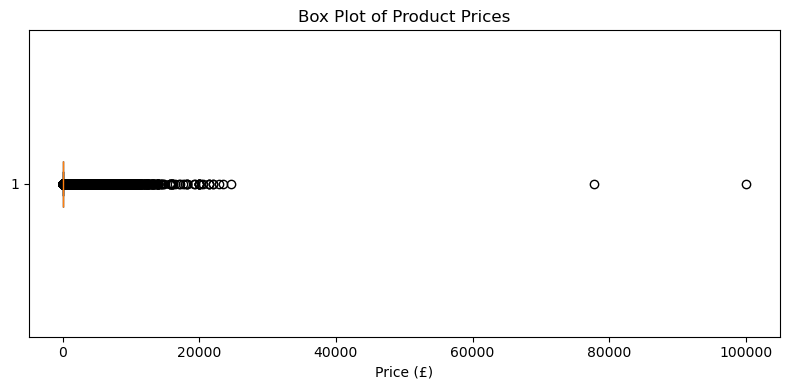

In [21]:
plt.figure(figsize=(8, 4))
plt.boxplot(amazon_df['price'], vert=False, patch_artist=True, boxprops=dict(facecolor='orange'))
plt.title('Box Plot of Product Prices')
plt.xlabel('Price (£)')
plt.tight_layout()
plt.show()

In [35]:
#PART 3 - 1) Measusres of Centrality

mean_rating = amazon_df['stars'].mean()
median_rating = amazon_df['stars'].median()
mode_rating = amazon_df['stars'].mode()

print(f"Mean Rating: {mean_rating:.2f}")
print(f"Median Rating: {median_rating:.2f}")
print(f"Mode Rating(s): {mode_rating.tolist()}")

Mean Rating: 2.15
Median Rating: 0.00
Mode Rating(s): [0.0]


In [34]:
#PART 3 - 2) Measusres of Dispersion

rating_variance = amazon_df['stars'].var()

rating_std = amazon_df['stars'].std()

Q1 = amazon_df['stars'].quantile(0.25)
Q3 = amazon_df['stars'].quantile(0.75)
rating_iqr = Q3 - Q1

print(f"Rating Variance: {rating_variance:.4f}")
print(f"Standard Deviation: {rating_std:.4f}")
print(f"Interquartile Range (IQR): {rating_iqr:.2f}")

Rating Variance: 4.8174
Standard Deviation: 2.1949
Interquartile Range (IQR): 4.40


In [33]:
#PART 3 - 3) Shape of the Distribution

from scipy.stats import skew, kurtosis

rating_skewness = skew(amazon_df['stars'])
rating_kurtosis = kurtosis(amazon_df['stars'], fisher=True)

print(f"Skewness: {rating_skewness:.3f}")
print(f"Kurtosis: {rating_kurtosis:.3f}")

Skewness: 0.081
Kurtosis: -1.926


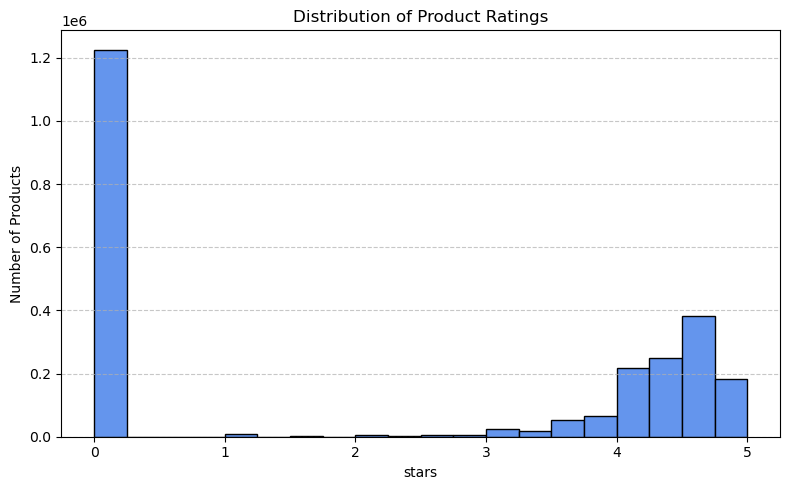

In [29]:
#PART 3 - 4) Visualization

plt.figure(figsize=(8, 5))
plt.hist(amazon_df['stars'], bins=20, color='cornflowerblue', edgecolor='black')
plt.title('Distribution of Product Ratings')
plt.xlabel('stars')
plt.ylabel('Number of Products')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()